<a href="https://colab.research.google.com/github/juliusmarkwei/neural-net-classifier/blob/main/net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import os
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model, model_from_json

%matplotlib inline

In [2]:
train_samples = []
train_labels = []

In [3]:
# generating a synthetic train data

for i in range(50):
  # The ~5% of younger individuals who did experience side effect
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)

  # The ~5% of older individuals who did not experience side effects
  random_older = randint(64, 100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  # The ~95% of younger individuals who did not experience side effect
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)

  # The ~95% of older individuals who did not experience side effects
  random_older = randint(64, 100)
  train_samples.append(random_older)
  train_labels.append(1)

In [4]:
train_samples[:10], train_labels[:10]

([24, 77, 53, 69, 14, 86, 25, 91, 61, 65], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [5]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_trained_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [7]:
scaled_trained_samples[:10]

array([[0.86206897],
       [0.64367816],
       [0.18390805],
       [0.48275862],
       [0.20689655],
       [0.8045977 ],
       [0.16091954],
       [0.70114943],
       [1.        ],
       [0.1954023 ]])

In [8]:
physical_device = tf.config.experimental.list_physical_devices('TPU')
print('Number of GPUs available: ', len(physical_device))
# tf.config.experimental.set_memory_growth(physical_device[0], True)

Number of GPUs available:  0


In [9]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    x=scaled_trained_samples,
    y=train_labels,
    validation_split=0.1,
    batch_size=10,
    epochs=30,
    shuffle=True,
    verbose=2
)

Epoch 1/30
189/189 - 2s - loss: 0.5737 - accuracy: 0.7085 - val_loss: 0.4743 - val_accuracy: 0.8238 - 2s/epoch - 11ms/step
Epoch 2/30
189/189 - 0s - loss: 0.3773 - accuracy: 0.8841 - val_loss: 0.3039 - val_accuracy: 0.9238 - 361ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.2835 - accuracy: 0.9275 - val_loss: 0.2539 - val_accuracy: 0.9476 - 312ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2609 - accuracy: 0.9323 - val_loss: 0.2379 - val_accuracy: 0.9619 - 369ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2534 - accuracy: 0.9381 - val_loss: 0.2339 - val_accuracy: 0.9476 - 318ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2493 - accuracy: 0.9339 - val_loss: 0.2263 - val_accuracy: 0.9571 - 340ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.2461 - accuracy: 0.9376 - val_loss: 0.2222 - val_accuracy: 0.9619 - 309ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.2439 - accuracy: 0.9392 - val_loss: 0.2280 - val_accuracy: 0.9286 - 431ms/epoch - 2ms/step
Ep

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
# generating a synthetic test data

test_samples = []
test_labels = []

for i in range(10):
  # The ~5% of younger individuals who did experience side effect
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(1)

  # The ~5% of older individuals who did not experience side effects
  random_older = randint(64, 100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  # The ~95% of younger individuals who did not experience side effect
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(0)

  # The ~95% of older individuals who did not experience side effects
  random_older = randint(64, 100)
  test_samples.append(random_older)
  test_labels.append(1)

In [15]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_samples, test_labels = shuffle(test_samples, test_labels)

In [16]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [17]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=2)

42/42 - 0s - 191ms/epoch - 5ms/step


In [18]:
predictions[:10]

array([[0.9628216 , 0.0371783 ],
       [0.18422645, 0.81577355],
       [0.03391305, 0.96608686],
       [0.9608988 , 0.03910105],
       [0.00920206, 0.99079806],
       [0.43210867, 0.5678914 ],
       [0.9636845 , 0.0363155 ],
       [0.00319557, 0.9968044 ],
       [0.4321086 , 0.56789136],
       [0.00806561, 0.9919344 ]], dtype=float32)

In [19]:
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions[:10]

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [20]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [21]:
cm

array([[192,  18],
       [ 10, 200]])

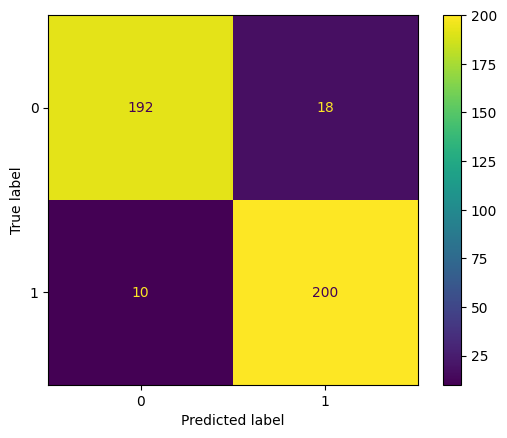

In [22]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [23]:
if os.path.isfile('models/classnet.h5') is False:
  model.save('model/classnet.h5')

In [24]:
new_model = load_model('model/classnet.h5')

In [25]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [26]:
new_model.get_weights()

[array([[-0.5100902 ,  0.7546959 , -0.2425533 , -0.34899378,  0.52028424,
          0.52277356, -0.522653  ,  0.48221865,  0.61052805, -0.21427381,
         -0.10672125, -0.5688113 ,  0.4133672 , -0.32857683, -0.03765231,
         -0.5318088 ]], dtype=float32),
 array([ 0.        , -0.15332481,  0.        ,  0.        , -0.21480258,
        -0.25835818,  0.        , -0.17856234, -0.2570437 ,  0.        ,
         0.        ,  0.        , -0.20788006,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[-3.04804444e-02,  2.81362087e-01,  8.19735229e-02,
         -2.54060030e-01,  1.38959289e-03,  1.59040719e-01,
          2.67842203e-01,  7.58960247e-02, -2.67269015e-01,
          2.16065675e-01,  3.40463221e-02,  5.68028986e-02,
          8.36066306e-02,  3.18333179e-01, -3.39092612e-02,
         -2.16893330e-01,  3.20872664e-03,  5.79132140e-02,
         -2.77180016e-01,  3.25423211e-01, -1.85753465e-01,
          9.20960903e-02, -3.41443330e-01, -2.99338371e-01,
 

In [27]:
new_model.optimizer

In [28]:
# model to JSON

json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [29]:
# save to YAML

# yaml_string = model.to_yaml()
# yaml_string

In [30]:
# model construction from JSON
model_architecture = model_from_json(json_string)

In [31]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
